# Análise de Atrito de Funcionários
A rotatividade de funcionários (atrito/churn) representa um custo alto para as organizações, envolvendo gastos com novos processos seletivos, treinamento e perda de conhecimento tácito. Além do impacto financeiro, altas taxas de saída podem indicar problemas culturais ou de gestão.

## Configuração: bibliotecas e dados
Carregamento das bibliotecas necessárias para análise exploratória (pandas, numpy) e visualização (matplotlib, seaborn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1. Visão geral do dataset
O objetivo desta seção é entender a saúde dos dados antes de iniciar as análises profundas. Vamos verificar a tipagem, volumetria e limpeza básica.

In [3]:
df.info()
display(df.isnull().sum())
print('Duplicados:', df.duplicated().sum())

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Duplicados: 0


## 2. Análise Exploratória de Dados (EDA)
Análise de características demográficas, profissionais e comportamentais dos funcionários. Vamos dividir a análise em três pilares: Variáveis Numéricas, Categóricas e de Satisfação.

### 2.1 Numéricas
Variáveis contínuas como idade, salário e tempo de empresa. Os Histogramas mostram distribuições gerais e os boxplots comparam diferenças entre quem saiu e quem ficou.

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numéricas:', len(numeric_cols))
print(numeric_cols)

Numéricas: 26
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [5]:
display(df[numeric_cols].describe())
display(df[numeric_cols].head(10))

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
5,32,1005,2,2,1,8,4,79,3,1,...,3,80,0,8,2,2,7,7,3,6
6,59,1324,3,3,1,10,3,81,4,1,...,1,80,3,12,3,2,1,0,0,0
7,30,1358,24,1,1,11,4,67,3,1,...,2,80,1,1,2,3,1,0,0,0
8,38,216,23,3,1,12,4,44,2,3,...,2,80,0,10,2,3,9,7,1,8
9,36,1299,27,3,1,13,3,94,3,2,...,2,80,2,17,3,2,7,7,7,7


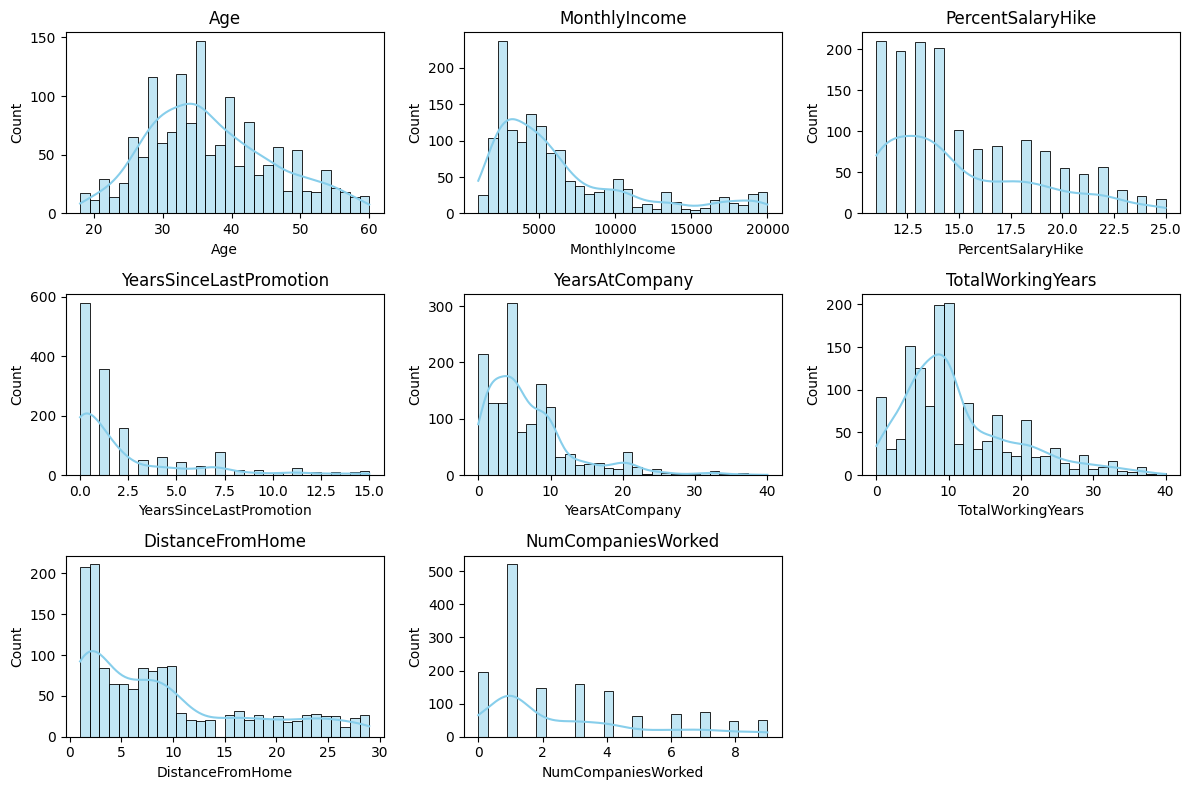

In [6]:
key_numeric_cols = ['Age','MonthlyIncome','PercentSalaryHike','YearsSinceLastPromotion',
                    'YearsAtCompany','TotalWorkingYears','DistanceFromHome','NumCompaniesWorked']
plt.figure(figsize=(12,8))
for i, col in enumerate(key_numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.savefig('../img/numeric_distributions.png', bbox_inches='tight', dpi=100)
plt.show()

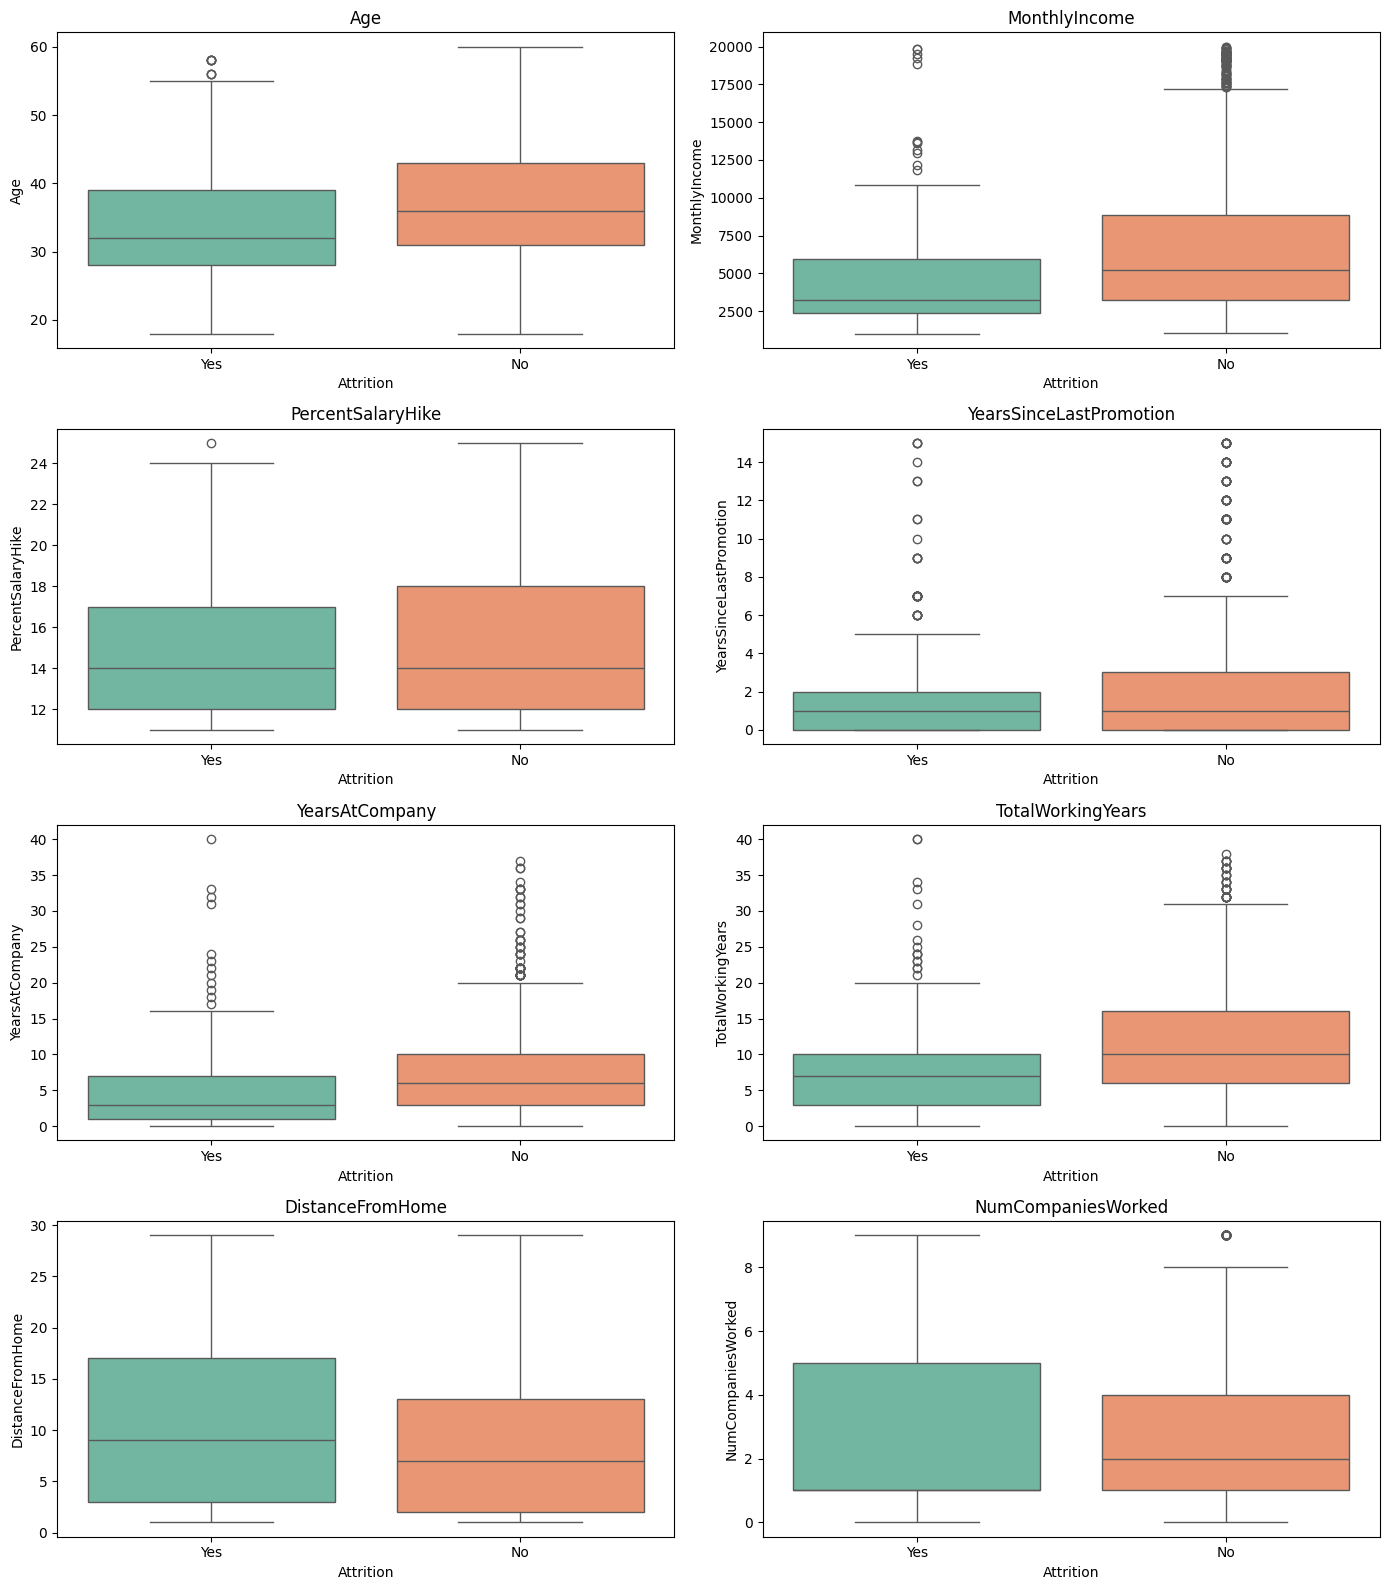

In [7]:
plt.figure(figsize=(14,16))
for i, col in enumerate(key_numeric_cols,1):
    plt.subplot(4,2,i)
    sns.boxplot(x='Attrition', y=col, data=df, palette='Set2', hue='Attrition', legend=False)
    plt.title(col)
plt.tight_layout()
plt.savefig('../img/attrition_boxplots.png', bbox_inches='tight', dpi=100)
plt.show()

### 2.2 Categóricas
Variáveis qualitativas como cargo, status civil, viagens de trabalho. Os Gráficos de barras empilhadas mostram taxa de atrito por categoria (proporção de "Sim" vs "Não" em cada grupo).

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Categóricas:', len(categorical_cols))
print(categorical_cols)

Categóricas: 9
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


C:\Users\joaop\AppData\Local\Temp\ipykernel_24268\1595647649.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [9]:
display(df[categorical_cols].nunique())

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

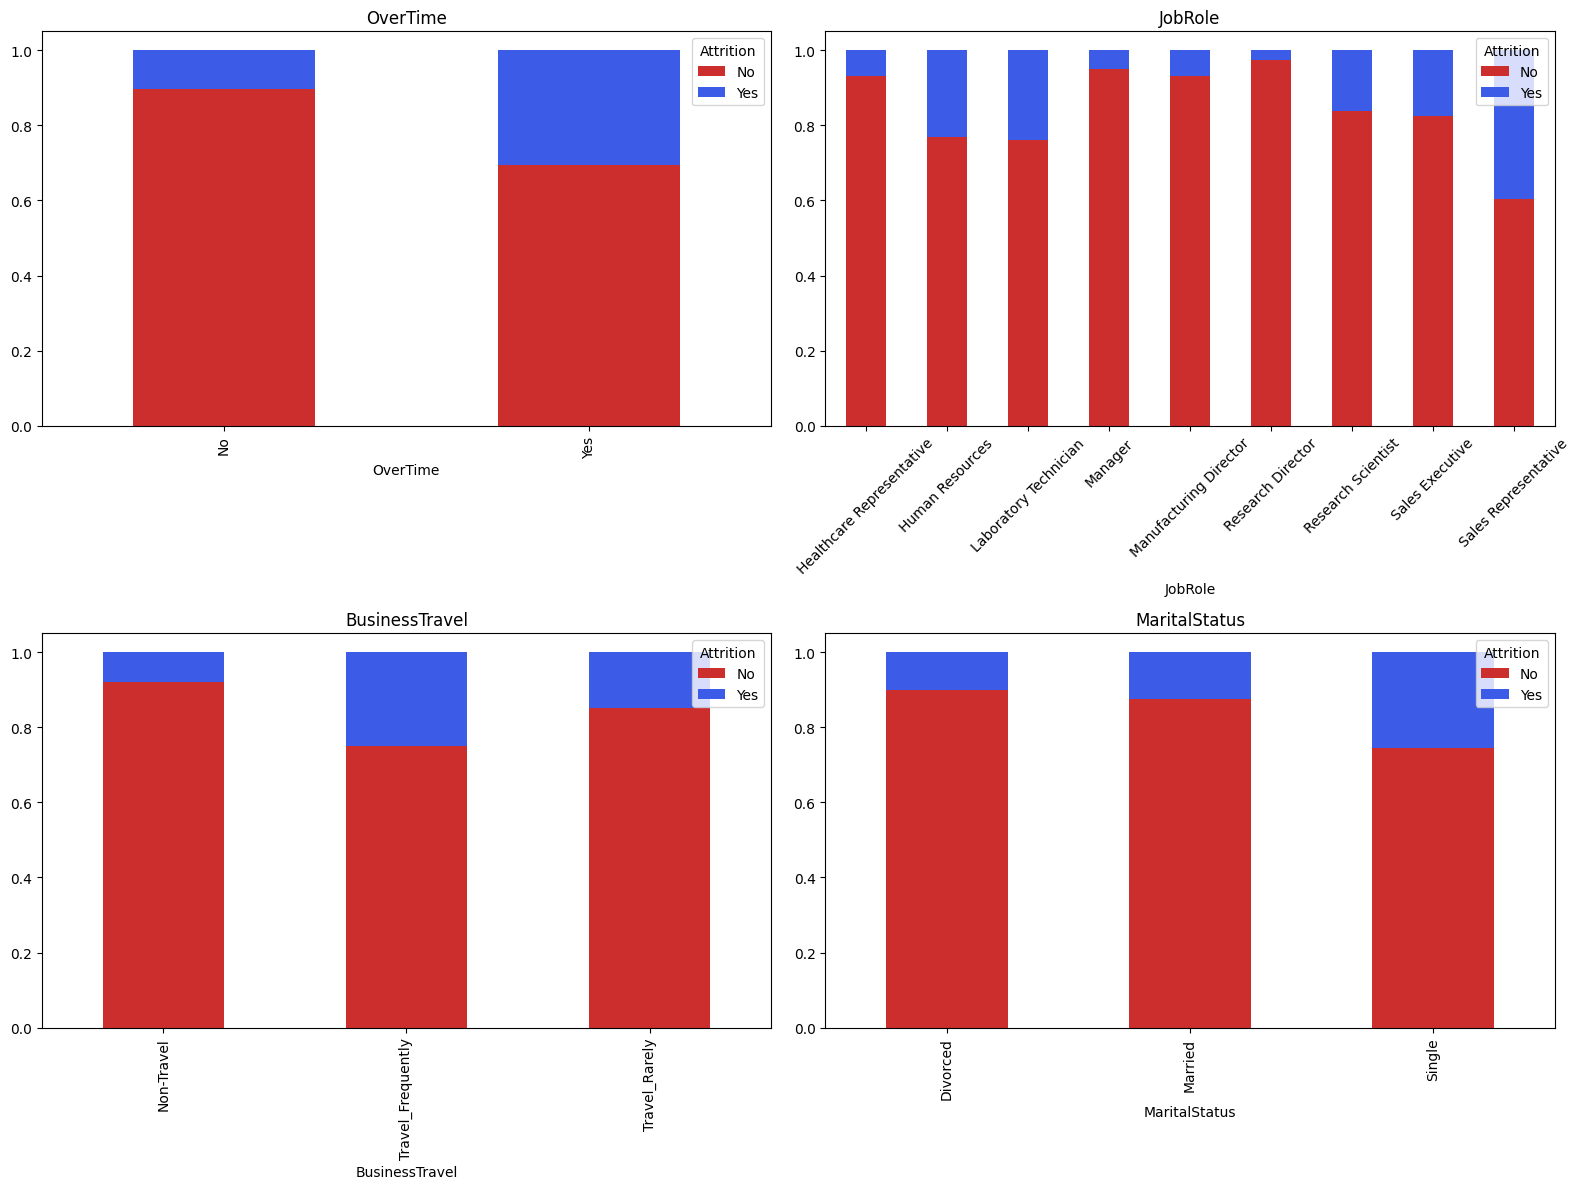

In [10]:
key_cat_cols = ['OverTime','JobRole','BusinessTravel','MaritalStatus']
fig, axes = plt.subplots(2,2, figsize=(16,12))
axes = axes.flatten()
for i, col in enumerate(key_cat_cols):
    ct = pd.crosstab(df[col], df['Attrition'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=axes[i], color=['#cc2e2e','#3c5be7'])
    axes[i].set_title(col)
    if col=='JobRole': axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../img/categorical_attrition.png', bbox_inches='tight', dpi=100)
plt.show()

## 3. Correlação
Mede a força e direção da relação linear entre variáveis e a saída de funcionários. Positivo = aumenta risco de atrito; Negativo = reduz risco. A heatmap mostra todas as correlações e o gráfico de barras ranking mostra impacto em ordem.

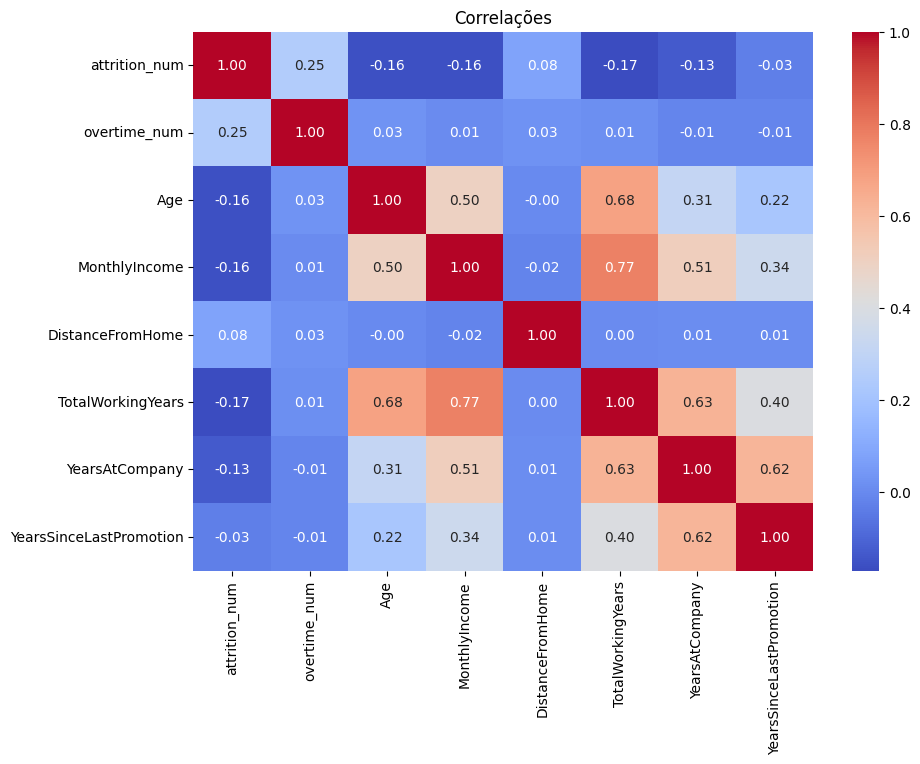

In [11]:
m = {'Yes':1,'No':0}
df['attrition_num'] = df['Attrition'].map(m)
df['overtime_num'] = df['OverTime'].map(m)
cols_for_corr = ['attrition_num','overtime_num','Age','MonthlyIncome','DistanceFromHome','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion']
plt.figure(figsize=(10,7))
sns.heatmap(df[cols_for_corr].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlações')
plt.savefig('../img/correlation_matrix.png', bbox_inches='tight', dpi=100)
plt.show()

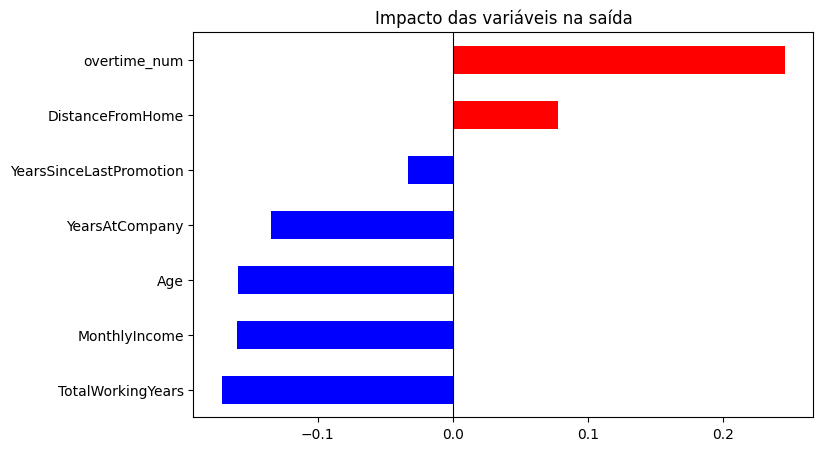

In [12]:
imp = df[cols_for_corr].corr()['attrition_num'].drop('attrition_num').sort_values()
plt.figure(figsize=(8,5))
cols = ['red' if x>0 else 'blue' for x in imp.values]
imp.plot(kind='barh', color=cols)
plt.axvline(0, color='k', linewidth=0.8)
plt.title('Impacto das variáveis na saída')
plt.savefig('../img/impacto_variaveis.png', bbox_inches='tight', dpi=100)
plt.show()

## 4. Análise de satisfação e ambiente
Estas variáveis são medidas em escala de 1 (Baixo/Ruim) a 4 (Muito Alto/Ótimo). A hipótese é que níveis baixos (1) atuem como gatilho imediato para a saída. O gráfico abaixo cruza cada nível com a proporção de atrito.

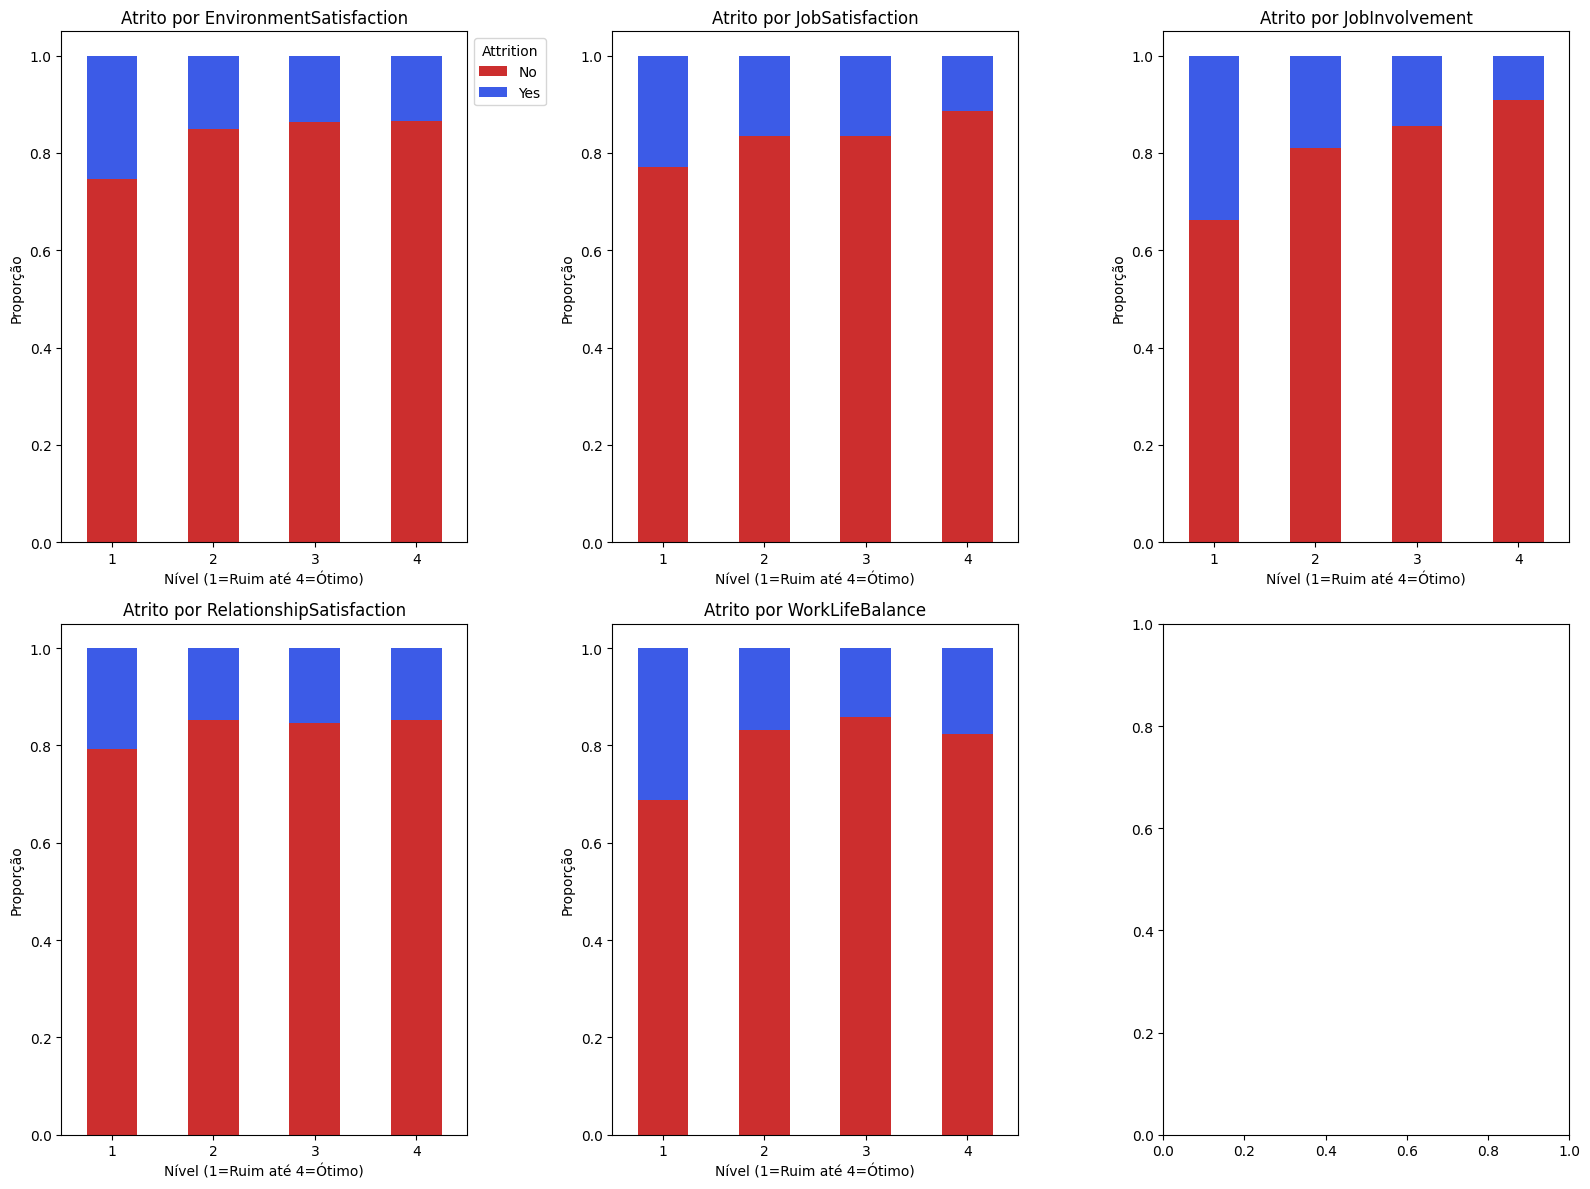

In [13]:
key_satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'RelationshipSatisfaction', 'WorkLifeBalance']

fig, axes = plt.subplots(2,3, figsize=(16,12))
axes = axes.flatten()

for i, col in enumerate(key_satisfaction_cols):
    ct = pd.crosstab(df[col], df['Attrition'], normalize='index')
    
    ct.plot(kind='bar', stacked=True, ax=axes[i], color=['#cc2e2e','#3c5be7'], rot=0)
    
    axes[i].set_title(f'Atrito por {col}')
    axes[i].set_xlabel('Nível (1=Ruim até 4=Ótimo)')
    axes[i].set_ylabel('Proporção')
    
    if i == 0:
        axes[i].legend(title='Attrition', loc='upper left', bbox_to_anchor=(1,1))
    else:
        axes[i].legend_.remove()
        
plt.tight_layout()
plt.savefig('../img/satisfaction_attrition.png', bbox_inches='tight', dpi=100)
plt.show()

## 5. Machine Learning
Com base nos insights da EDA, foi construido um modelo para prever futuros casos de saída.

* #### 5.1 Pré-processamento dos dados

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [22]:
df_ml = df.copy()

cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'attrition_num', 'overtime_num']
df_ml = df_ml.drop(columns=[col for col in cols_to_drop if col in df_ml.columns])

df_ml['Attrition'] = LabelEncoder().fit_transform(df_ml['Attrition'])

df_ml = pd.get_dummies(df_ml, drop_first=True)

print('Tamanho do dataset processado:', df_ml.shape)
df_ml.head()

Tamanho do dataset processado: (1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


* #### 5.2 Treinamento e Ajuste de Limiar (Threshold Tuning)
Por padrão, modelos de classificação definem o corte em 50% (0.50). Porém, em problemas de RH, o custo de não identificar um funcionário que vai sair (Falso Negativo) é muito maior do que o custo de alertar um funcionário que ficaria (Falso Positivo). Abaixo, foi testado diferentes limiares para otimizar o Recall:

In [23]:
X = df_ml.drop('Attrition', axis=1)
y = df_ml['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_proba = rf_model.predict_proba(X_test)[:, 1]

print(f"{'Limiar':<10} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 46)

thresholds = [0.50, 0.40, 0.30, 0.25, 0.20, 0.15]

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    report = classification_report(y_test, y_pred_t, output_dict=True)
    
    prec = report['1']['precision']
    rec = report['1']['recall']
    f1 = report['1']['f1-score']
    
    print(f"{t:<10} | {prec:.2f}{'':<6} | {rec:.2f}{'':<6} | {f1:.2f}")

Limiar     | Precision  | Recall     | F1-Score  
----------------------------------------------
0.5        | 0.43       | 0.08       | 0.14
0.4        | 0.43       | 0.17       | 0.24
0.3        | 0.42       | 0.34       | 0.38
0.25       | 0.38       | 0.44       | 0.41
0.2        | 0.33       | 0.52       | 0.40
0.15       | 0.28       | 0.72       | 0.41


* #### 5.3 Interpretação do Modelo (Feature Importance)
O Random Forest permite ver quais variáveis tiveram maior peso na decisão matemática do modelo.

C:\Users\joaop\AppData\Local\Temp\ipykernel_24268\2660652455.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


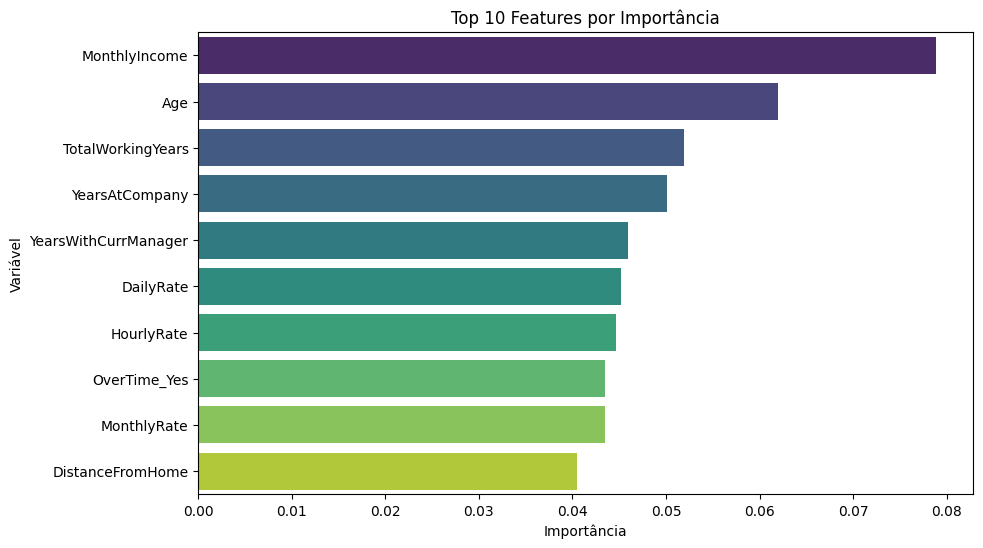

In [27]:
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 10 Features por Importância')
plt.xlabel('Importância')
plt.ylabel('Variável')

plt.savefig('../img/feature_importance.png', bbox_inches='tight', dpi=100)
plt.show()

#### 5.4 Resultado Final e Decisão de Negócio
Decisão: Foi escolhido um limiar de corte de 0.15. Isso significa que se o modelo detectar mais de 15% de probabilidade de saída, ele emitirá um alerta.

Impacto: Com o corte padrão (0.50), seria encontrado menos de 10% das pessoas que saíram. Com o ajuste para 0.15, o Recall sobe para cerca de 70-75%.

Ação: O RH recebe uma lista maior de "risco", permitindo atuar preventivamente.

In [34]:
limiar = 0.15

y_pred_final = (y_proba >= limiar).astype(int)

print("Relatorio de classificação:")
print(classification_report(y_test, y_pred_final))

cm = confusion_matrix(y_test, y_pred_final)

cm_df = pd.DataFrame(cm, 
                     columns=['Pred: Fica', 'Pred: Sai'],
                     index=['True: Fica', 'True: Sai'])
print("Matriz de Confusão:")
display(cm_df)

Relatorio de classificação:
              precision    recall  f1-score   support

           0       0.92      0.65      0.77       370
           1       0.28      0.72      0.41        71

    accuracy                           0.66       441
   macro avg       0.60      0.69      0.59       441
weighted avg       0.82      0.66      0.71       441

Matriz de Confusão:


,Pred: Fica,Pred: Sai
True: Fica,242,128
True: Sai,20,51
